In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

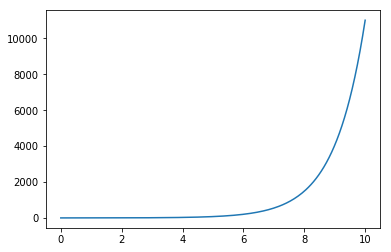

In [60]:
t = np.linspace(0,10,237)
exp = []
for i in range(len(t)):
    exp.append(math.sinh(t[i]))
plt.plot(t,exp)

In [61]:
#this functions for the first derivative
#takes in array t and function f(x,t) (the derivative)
def rk4a( f, x0, t ):
    n = len( t )
    x = np.array( [ x0 ] * n )
    for i in xrange( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0

    return x

def fx(t,y):
    return math.cosh(y)

def err(a,b):
    e=[]
    for i in range(len(b)):
        e.append(math.log(abs((b[i]-a[i])/a[i])))
    return e

/home/mroosa/.local/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in double_scalars


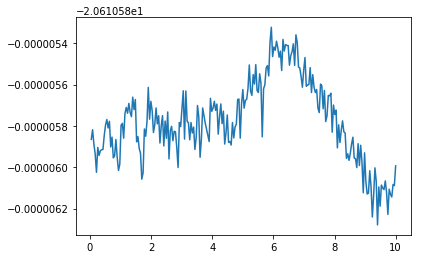

In [62]:
resa = rk4a(fx,0.0,t)


   
#plt.plot(t,res,'r')
#plt.plot(t,exp, 'b')
plt.plot(t,err(exp,resa))

In [63]:
def rk4step( f, x, t,h):

    k1 = h * f( x, t )
    k2 = h * f( x + 0.5 * k1, t + 0.5 * h )
    k3 = h * f( x + 0.5 * k2, t + 0.5 * h )
    k4 = h * f( x + k3, t + h  )
    return ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.
    
def rk4b( f, x0, t ):
    n = len( t )
    x = np.array( [ x0 ] * n )
    
    #assume non-adaptive, pulled out of the loop for efficiency 
    h = t[1] - t[0]
    for i in xrange( n - 1 ):
        x[i+1] = x[i]+rk4step(f,x[i],t[i],h)
    return x 
        

/home/mroosa/.local/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in double_scalars


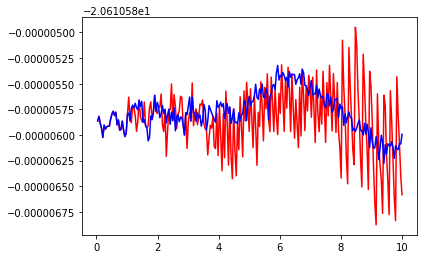

In [64]:
resb = rk4b(fx,0.0,t)

plt.plot(t,err(exp,resb),'r')
plt.plot(t,err(exp,resa),'b')

In [65]:
def rk4_2o( f, x0, v0, t ):
    n = len( t )
    v = np.array( [ v0 ] * n )
    x = np.array( [ x0 ] * n )
    #assume non-adaptive, pulled out of the loop for efficiency 
    h = t[1] - t[0]
    for i in xrange( n - 1 ):
        v[i+1] = v[i] + rk4step(f,x[i],t[i],h)
        x[i+1] = x[i] + v[i]
    return x 
        

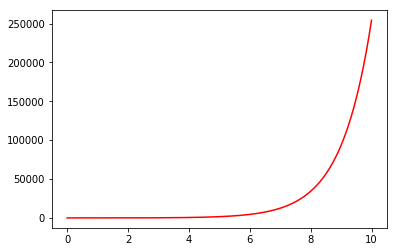

In [68]:
def fx2(t,y):
    return math.sinh(y)

res2 = rk4_2o(fx2,0.0,0.0,t)
plt.plot(t,res2,'r')
#plt.plot(t,err(exp,res2),'r')